# Assignment 2 - Code Performance Grade

## Problem 1

In [1]:
import numpy as np
from a2 import direct_stiffness_method as dsm

# Define nodes and elements
x_coords = np.linspace(0,25,7)
y_coords = np.linspace(0,50,7)
z_coords = np.linspace(0,37,7)
nodes = np.concatenate((x_coords.reshape(-1,1),y_coords.reshape(-1,1),z_coords.reshape(-1,1)),axis=1)
elements = np.array([[0,1],[1,2],[2,3],[3,4],[4,5],[5,6]])

# Define subdomains and material properties
r=1
E=10000
nu=0.3
A=np.pi*r**2
Iy=Iz=np.pi*r**4/4
Ip=J=np.pi*r**4/2
subdomain_dict = {1:[E,nu,A,Iz,Iy,Ip,J]}
subdomain_elements = {1:[0,1,2,3,4,5,6]}

# Define supports and loads
supports = {0: (0, 0, 0, 0, 0, 0)}
loads = {6:[0.05,-0.1,0.23,0.1,-0.025,-0.08]}

# Initialize classes
mesh = dsm.Mesh(nodes, elements)
materials = dsm.MaterialParams(subdomain_dict)
for subdomain_id, elements_in_sub in subdomain_elements.items():
    materials.assign_subdomain(subdomain_id, elements_in_sub)

bcs = dsm.BoundaryConditions(supports)
bcs.add_load(loads)

# Solve the system
solver = dsm.Solver(mesh, materials, bcs)
displacements, reactions = solver.generate_mesh_and_solve()

node 0 disp: [u:0.0, v:0.0, w:0.0, theta_x:0.0, theta_y:0.0, theta_z:0.0]
node 0 rxn: [Fx:-0.05, Fy:0.1, Fz:-0.23, Mx:-15.3, My:3.925, Mz:5.08]
------------------------------------------------------------------
node 1 disp: [u:0.01221, v:-0.07762, w:0.09669, theta_x:0.01996, theta_y:-0.00513, theta_z:-0.00664]
node 1 rxn: [Fx:0.0, Fy:0.0, Fz:0.0, Mx:0.0, My:0.0, Mz:0.0]
------------------------------------------------------------------
node 2 disp: [u:0.04603, v:-0.29241, w:0.36413, theta_x:0.03631, theta_y:-0.00933, theta_z:-0.01209]
node 2 rxn: [Fx:0.0, Fy:0.0, Fz:0.0, Mx:0.0, My:0.0, Mz:0.0]
------------------------------------------------------------------
node 3 disp: [u:0.09729, v:-0.6172, w:0.76845, theta_x:0.04907, theta_y:-0.01261, theta_z:-0.01636]
node 3 rxn: [Fx:0.0, Fy:0.0, Fz:0.0, Mx:0.0, My:0.0, Mz:0.0]
------------------------------------------------------------------
node 4 disp: [u:0.16181, v:-1.02483, w:1.27576, theta_x:0.05821, theta_y:-0.01497, theta_z:-0.01945]
no

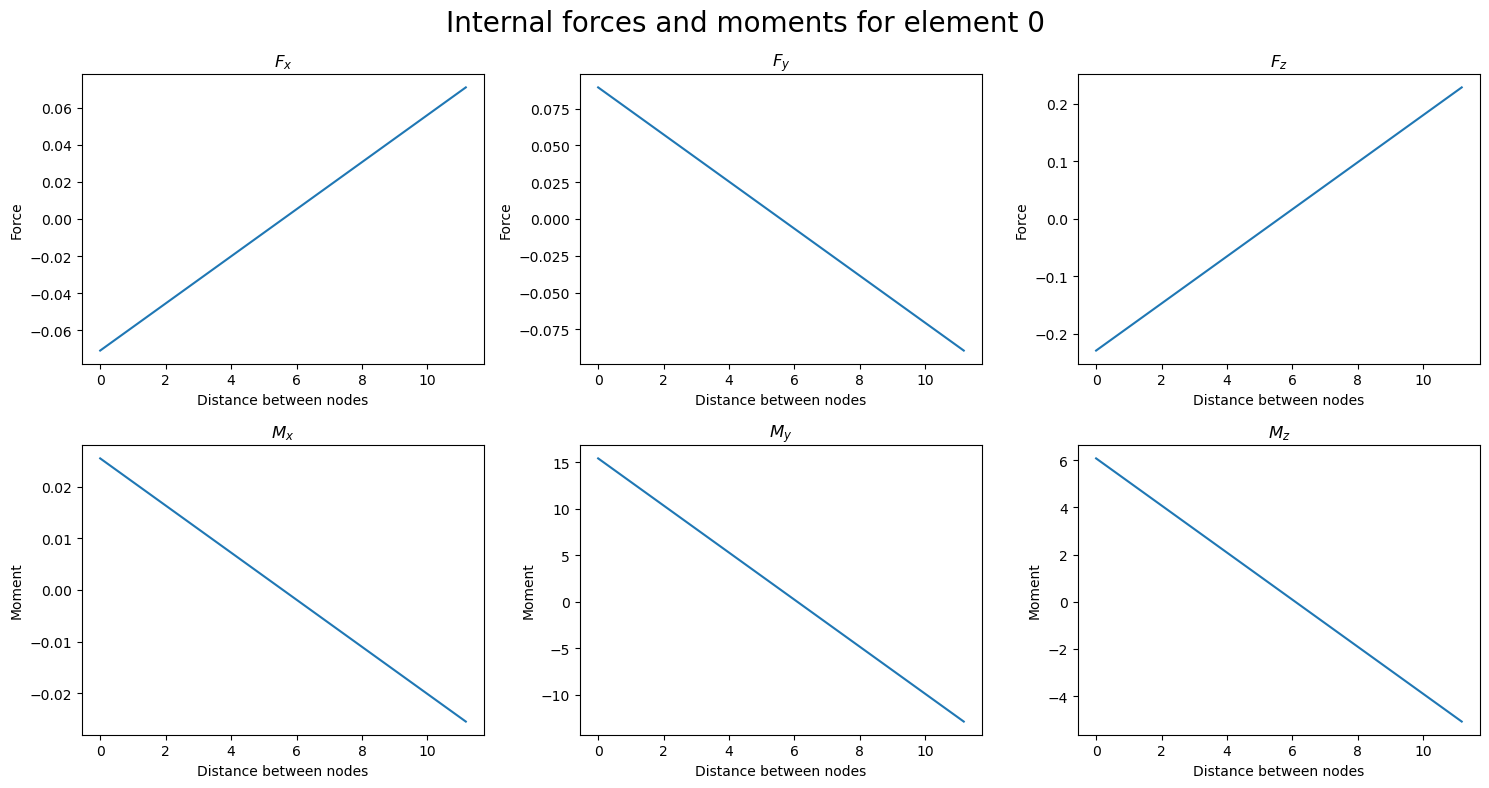

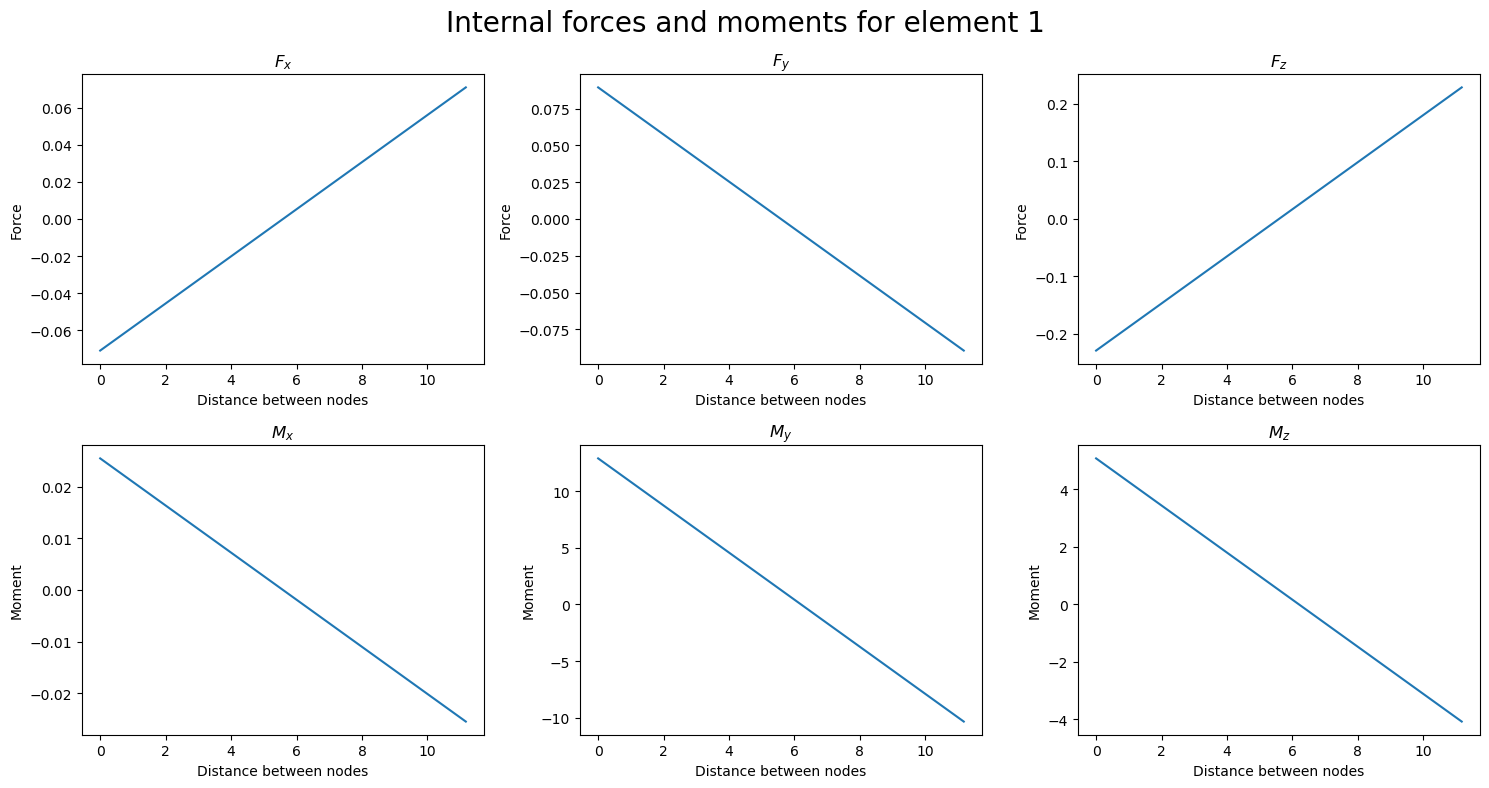

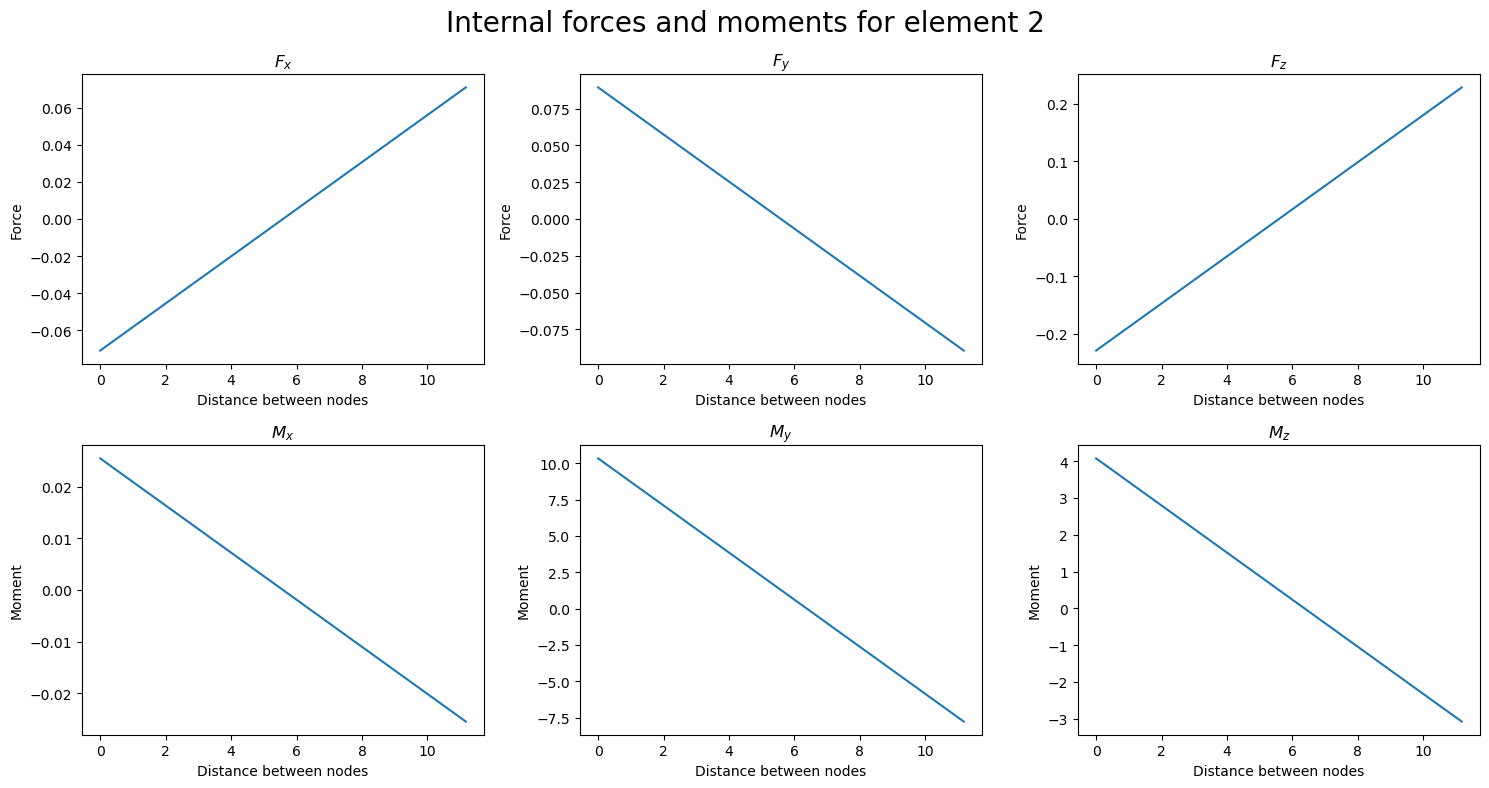

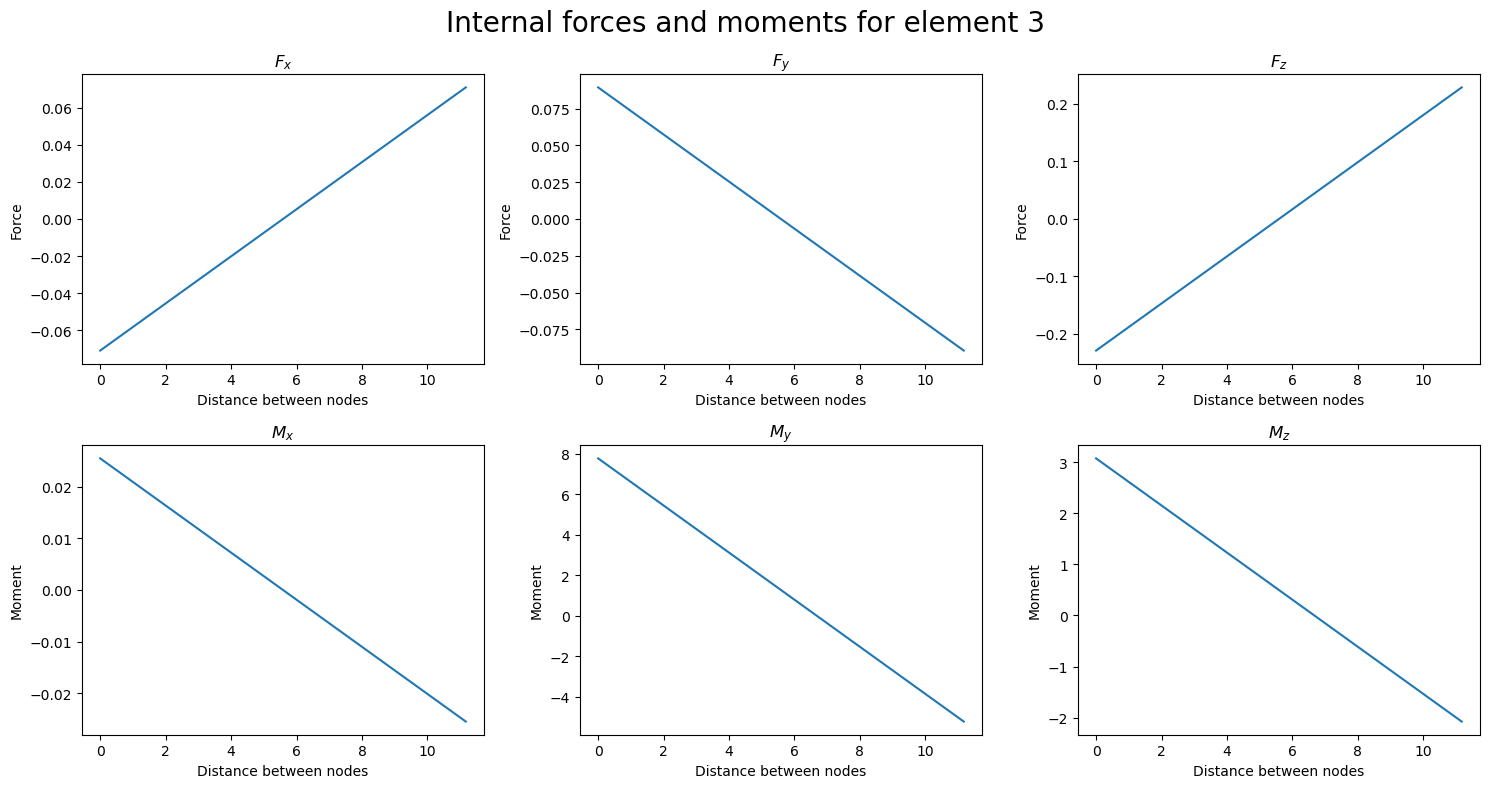

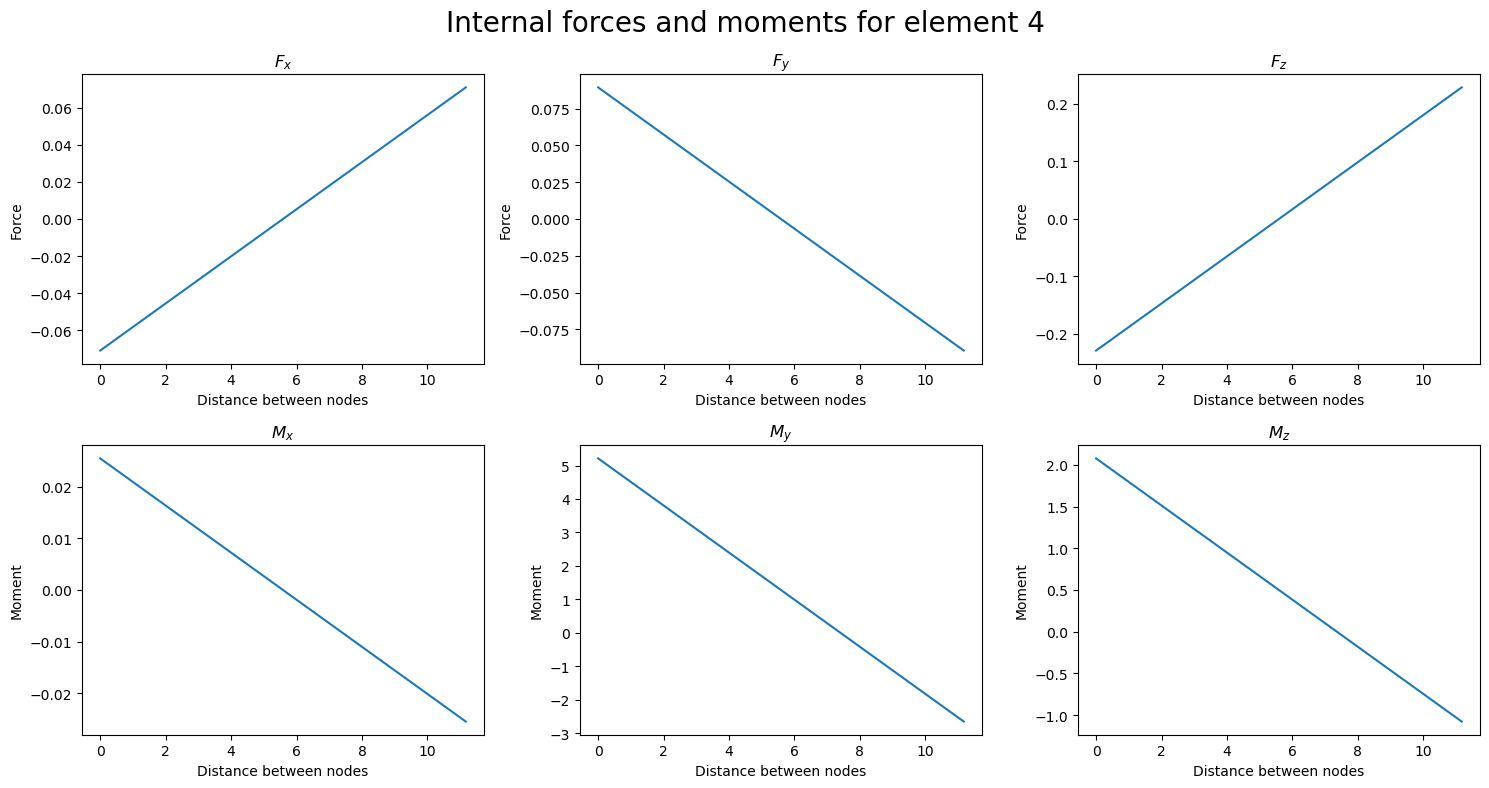

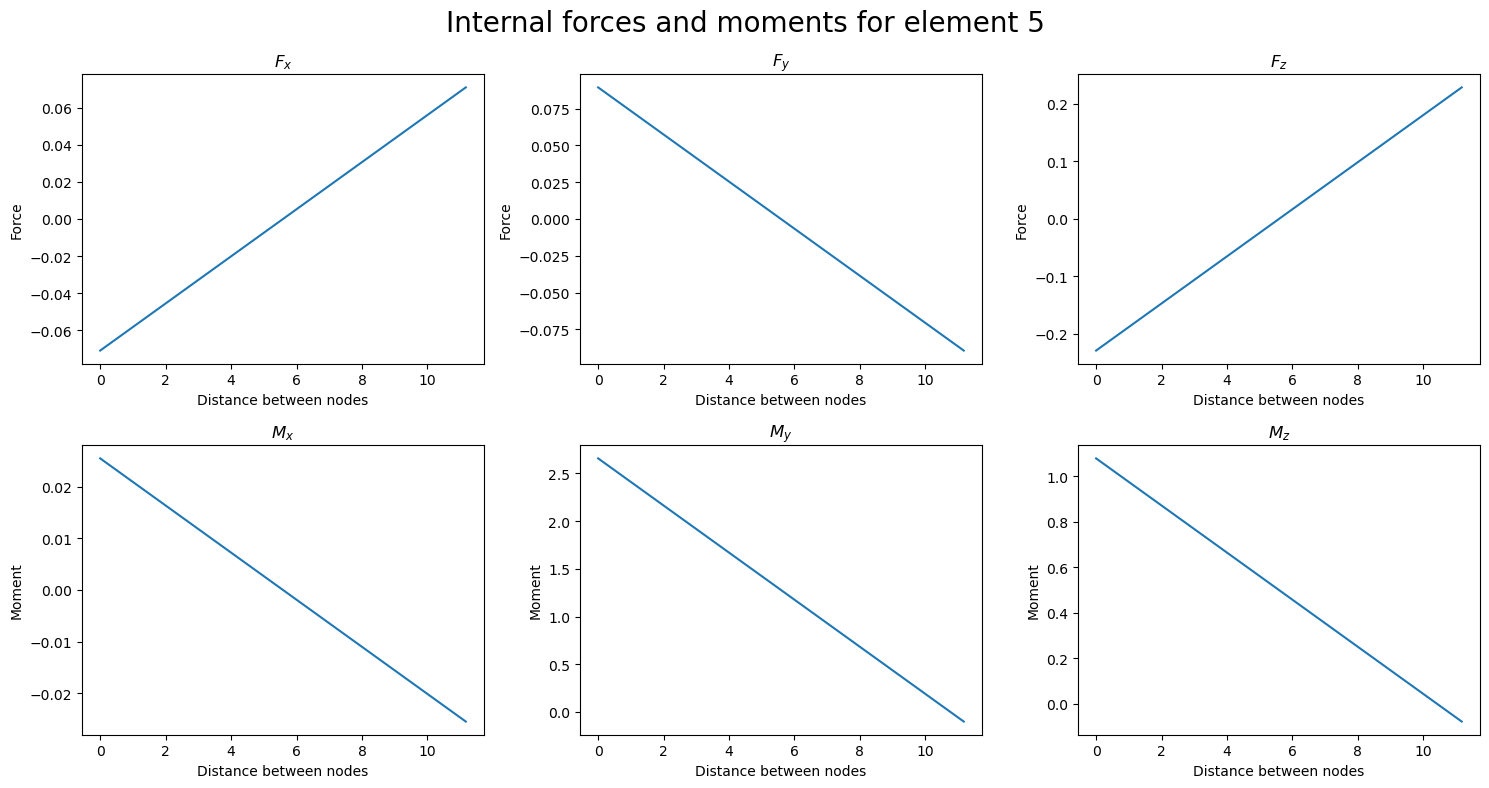

In [2]:
int_forces = solver.compute_local_int_forces_and_moments(displacements)
solver.plot_internal_forces(int_forces)

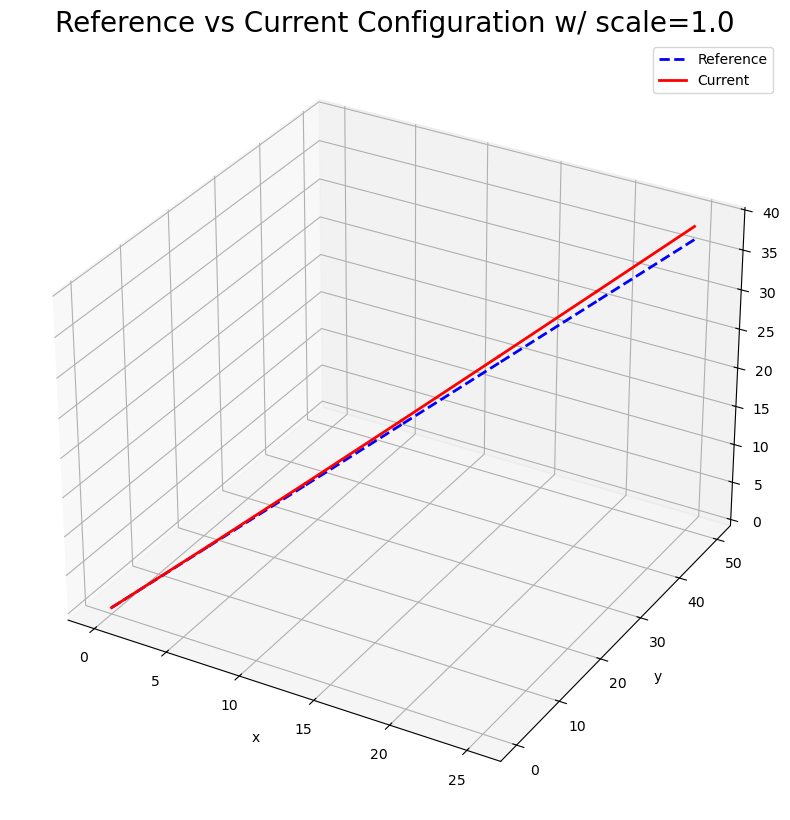

In [5]:
solver.plot_deformed_structure(displacements,scale=1.0)

## Problem 2

In [1]:
import numpy as np
from a2 import direct_stiffness_method as dsm

# Define nodes and elements
x_coords = np.linspace(0,25,7)
y_coords = np.linspace(0,50,7)
z_coords = np.linspace(0,37,7)
nodes = np.concatenate((x_coords.reshape(-1,1),y_coords.reshape(-1,1),z_coords.reshape(-1,1)),axis=1)
elements = np.array([[0,1],[1,2],[2,3],[3,4],[4,5],[5,6]])

# Define subdomains and material properties
r=1
E=10000
nu=0.3
A=np.pi*r**2
Iy=Iz=np.pi*r**4/4
Ip=J=np.pi*r**4/2
subdomain_dict = {1:[E,nu,A,Iz,Iy,Ip,J]}
subdomain_elements = {1:[0,1,2,3,4,5,6]}

# Define supports and loads
supports = {0: (0, 0, 0, 0, 0, 0)}

P=1
L=np.sqrt((25)**2.0 + (50)**2.0 + (37)**2.0)
Fx = -1.0 * P * (25) / L
Fy = -1.0 * P * (50) / L
Fz = -1.0 * P * (37) / L
loads = {6:[Fx,Fy,Fz,0,0,0]}

# Initialize classes
mesh = dsm.Mesh(nodes, elements)
materials = dsm.MaterialParams(subdomain_dict)
for subdomain_id, elements_in_sub in subdomain_elements.items():
    materials.assign_subdomain(subdomain_id, elements_in_sub)

bcs = dsm.BoundaryConditions(supports)
bcs.add_load(loads)

# Solve the system
solver = dsm.Solver(mesh, materials, bcs)
eigvals,eigvecs=solver.solve_critical_buckling_load()
print(f'Critical load factor = {eigvals[0]}')

Critical load factor = 4.312204919834717


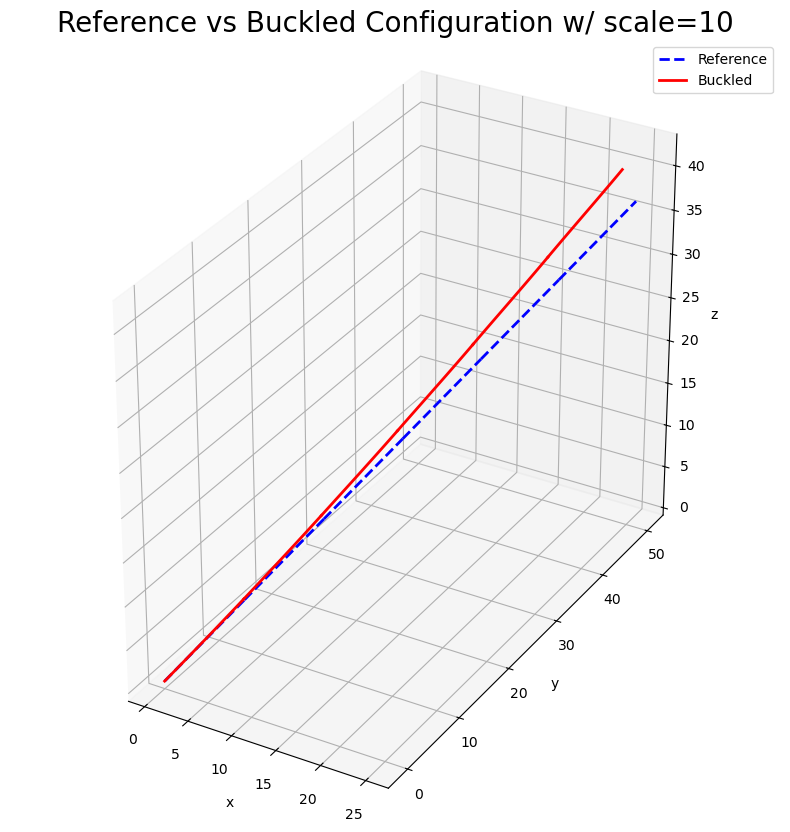

In [2]:
solver.plot_buckled_structure(eigvecs[:,0],scale=10,axis_equal=True)

## Problem 3

In [1]:
import numpy as np
from a2 import direct_stiffness_method as dsm

# Define nodes and elements
x0,y0,z0=0,0,0
L1,L2,L3,L4=11,23,15,13
nodes = np.array([[x0,y0,z0],[x0+L1,y0,z0],[x0+L1,y0+L2,z0],[x0,y0+L2,z0],
                  [x0,y0,z0+L3],[x0+L1,y0,z0+L3],[x0+L1,y0+L2,z0+L3],[x0,y0+L2,z0+L3],
                  [x0,y0,z0+L3+L4],[x0+L1,y0,z0+L3+L4],[x0+L1,y0+L2,z0+L3+L4],[x0,y0+L2,z0+L3+L4]])
elements = np.array([[0,4],[1,5],[2,6],[3,7],
                     [4,8],[5,9],[6,10],[7,11],
                     [4,5],[5,6],[6,7],[4,7],
                     [8,9],[9,10],[10,11],[8,11]])

# Define subdomains and material properties
E_a=10000
nu_a=0.3
r_a=1
A_a=np.pi*r_a**2
Iy_a=np.pi*r_a**4/4
Iz_a=np.pi*r_a**4/4
I_rho_a=np.pi*r_a**4/2
J_a=np.pi*r_a**4/2

E_b=50000
nu_b=0.3
b=0.5
h=1
A_b=b*h
Iy_b=h*b**3/12
Iz_b=b*h**3/12
I_rho_b=b*h/12*(b**2 + h**2)
J_b=0.028610026041666667
local_z = np.asarray([0,0,1])
subdomain_dict = {1:[E_a,nu_a,A_a,Iz_a,Iy_a,I_rho_a,J_a,None],
                  2:[E_b,nu_b,A_b,Iz_b,Iy_b,I_rho_b,J_b,local_z]}
subdomain_elements = {1:[0,1,2,3,4,5,6,7],
                      2:[8,9,10,11,12,13,14,15]}

# Define supports and loads
supports = {0: (0, 0, 0, 0, 0, 0),
            1: (0, 0, 0, 0, 0, 0),
            2: (0, 0, 0, 0, 0, 0),
            3: (0, 0, 0, 0, 0, 0)}
P=1
loads = {8:[0,0,-P,0,0,0],
         9:[0,0,-P,0,0,0],
         10:[0,0,-P,0,0,0],
         11:[0,0,-P,0,0,0]}  # Load at node 1

# Initialize classes
mesh = dsm.Mesh(nodes, elements)
materials = dsm.MaterialParams(subdomain_dict)
for subdomain_id, elements_in_sub in subdomain_elements.items():
    materials.assign_subdomain(subdomain_id, elements_in_sub)

bcs = dsm.BoundaryConditions(supports)
bcs.add_load(loads)

# Solve the system
solver = dsm.Solver(mesh, materials, bcs)
# displacements, reactions = solver.generate_mesh_and_solve()
eigvals,eigvecs=solver.solve_critical_buckling_load()
print(f'Critical load factor = {eigvals[0]}')

Critical load factor = 39.21873716204386


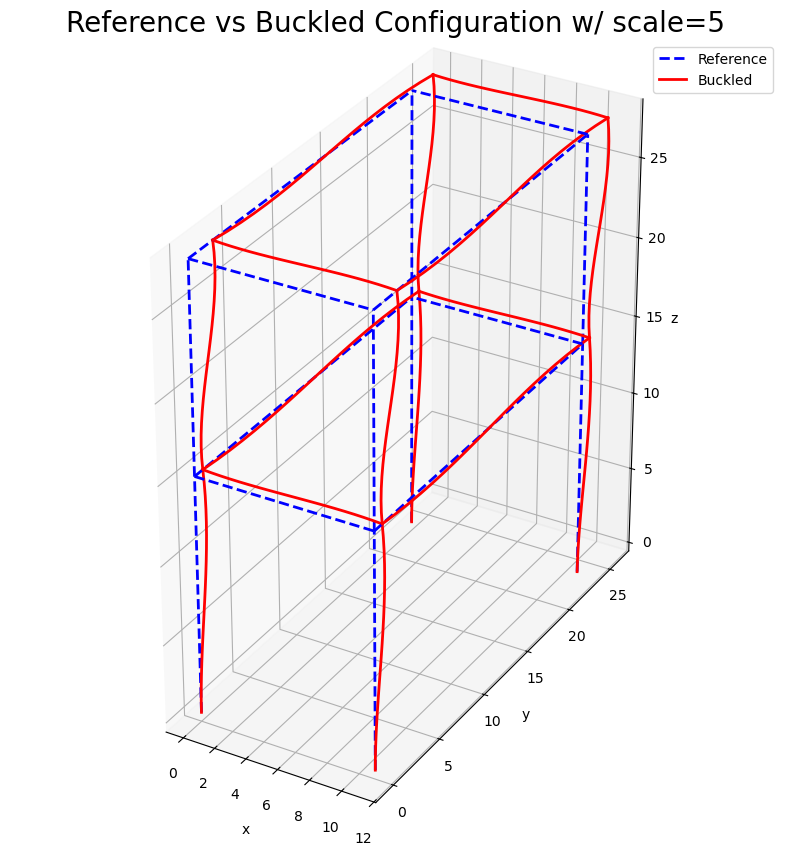

In [2]:
solver.plot_buckled_structure(eigvecs[:,0],scale=5,axis_equal=True)